In [17]:
import pandas as pd
df_raw = pd.read_csv("EDA_1.csv")

# to lower case
df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)

# remove null values from this column 156 na found
df_raw = df_raw[df_raw["Vehicle First Impact Location"].notna()]

df_raw = df_raw[df_raw["Driver At Fault"]!="unknown"]

df_raw["Vehicle First Impact Location"] = df_raw["Vehicle First Impact Location"].str.replace("roof top", "top", regex=True)
df_raw["Vehicle First Impact Location"] = df_raw["Vehicle First Impact Location"].str.replace(" ", "", regex=True)

df_raw["Vehicle Movement"] = df_raw["Vehicle Movement"].str.replace("making u-turn", "making u turn", regex=True)
df_raw["Vehicle Movement"] = df_raw["Vehicle Movement"].str.replace("parking", "parked", regex=True)

C:\Users\shyam\AppData\Local\Temp\ipykernel_484\1499786648.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("EDA_1.csv")
C:\Users\shyam\AppData\Local\Temp\ipykernel_484\1499786648.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)


In [18]:
df_raw.to_csv("EDA_2.csv")

In [19]:
df_raw["Driver Distracted By"].value_counts()

Driver Distracted By
not distracted                                       113982
unknown                                               34256
looked but did not see                                21053
inattentive or lost in thought                         4301
other distraction                                      3216
distracted by outside person object or event            950
other action (looking away from task, etc.)             459
by other occupants                                      414
other cellular phone related                            372
other electronic device (navigational palm pilot)       324
talking or listening to cellular phone                  280
no driver present                                       274
by moving object in vehicle                             211
eating or drinking                                      195
adjusting audio and or climate controls                 134
using other device controls integral to vehicle          92
texting from a cell

In [20]:
# merge "other distraction" and "other action (looking away from task, etc.)"
# merge "other cellular phone related" and "talking or listening to cellular phone"
# merge "adjusting audio and or climate controls" and "using other device controls integral to vehicle"

df_raw["Driver Distracted By"] = df_raw["Driver Distracted By"].str.replace("other distraction", "other action (looking away from task, etc.)", regex=True)
df_raw["Driver Distracted By"] = df_raw["Driver Distracted By"].str.replace("other cellular phone related", "talking or listening to cellular phone", regex=True)
df_raw["Driver Distracted By"] = df_raw["Driver Distracted By"].str.replace("adjusting audio and or climate controls", "using other device controls integral to vehicle", regex=True)


In [21]:
crosstab_5 = pd.crosstab(df_raw["Driver Distracted By"], df_raw["Driver At Fault"])
crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["no"])
crosstab_5.sort_values(by="yes", ascending=False)

Driver At Fault,no,yes,Y_Percentage
Driver Distracted By,,,
not distracted,78880,35102,0.307961
unknown,3790,30466,0.889362
looked but did not see,830,20223,0.960576
inattentive or lost in thought,31,4270,0.992792
"other action (looking away from task, etc.)",224,3451,0.939048
distracted by outside person object or event,58,892,0.938947
talking or listening to cellular phone,10,642,0.984663
by other occupants,8,406,0.980676
other electronic device (navigational palm pilot),5,319,0.984568


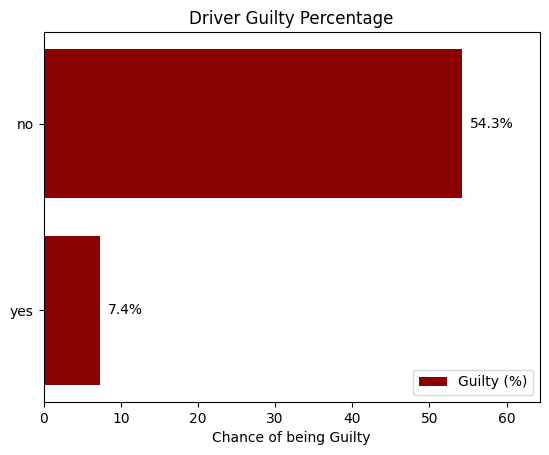

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of "Yes" (Guilty) for each state
crosstab_5["Yes_Percentage"] = (crosstab_5["yes"] / (crosstab_5["yes"] + crosstab_5["no"])) * 100

# Sort by the number of "Yes" (Guilty) in descending order
crosstab_8 = crosstab_5.sort_values(by="yes", ascending=False)

# Select the top 5 states with the most "Yes" counts
top_5 = crosstab_8.head(5)

# Sort the top 5 by 'Yes_Percentage' in descending order
top_5 = top_5.sort_values(by="Yes_Percentage", ascending=True)

# Prepare data for plotting
categories = list(top_5.index)
yes_ratios = top_5["Yes_Percentage"]  # Percentages for 'Yes'

# Convert categories to positions
x_indices = np.arange(len(categories))

# Plot
plt.barh(x_indices, yes_ratios, color='darkred', label='Guilty (%)')

# Adjust x-axis limits to accommodate annotations
plt.xlim(0, max(yes_ratios) + 10)  # Add padding to the right

# Annotate each bar with its percentage
for i, v in enumerate(yes_ratios):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10, color='black')  # Add text slightly to the right of the bar

# Labels and Title
plt.yticks(x_indices, categories)
plt.xlabel('Chance of being Guilty')
plt.title('Driver Guilty Percentage')

plt.legend()
plt.show()

In [23]:
df_raw["Parked Vehicle"].value_counts()

Parked Vehicle
no     177284
yes      2918
Name: count, dtype: int64

In [24]:
crosstab_5 = pd.crosstab(df_raw["Parked Vehicle"], df_raw["Driver At Fault"])
crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["no"])
crosstab_5.sort_values(by="yes", ascending=False)

Driver At Fault,no,yes,Y_Percentage
Parked Vehicle,,,
no,81050,96234,0.542824
yes,2703,215,0.073681


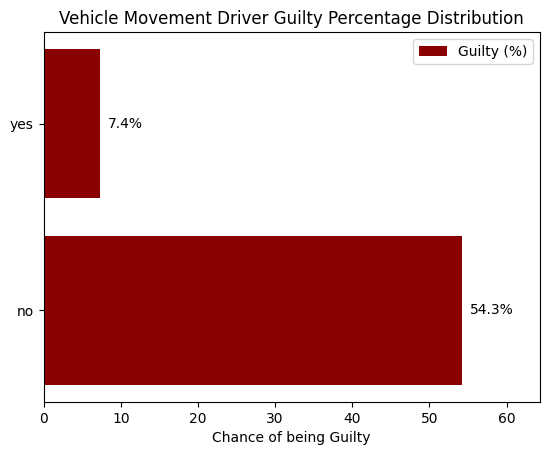

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of "Yes" (Guilty) for each category
crosstab_5["Yes_Percentage"] = (crosstab_5["yes"] / (crosstab_5["yes"] + crosstab_5["no"])) * 100

# Sort by 'Yes_Percentage' in ascending order
crosstab_5 = crosstab_5.sort_values(by="yes", ascending=False)

# Prepare data for plotting
categories = list(crosstab_5.index)[:9]
yes_ratios = crosstab_5["Yes_Percentage"][:9]  # Percentages for 'Yes'

# Convert categories to positions
x_indices = np.arange(len(categories))

# Plot
plt.barh(x_indices, yes_ratios, color='darkred', label='Guilty (%)')

# Adjust x-axis limits to accommodate annotations
plt.xlim(0, max(yes_ratios) + 10)  # Add padding to the right

# Annotate each bar with its percentage
for i, v in enumerate(yes_ratios):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10, color='black')  # Add text slightly to the right of the bar

# Labels and Title
plt.yticks(x_indices, categories)
plt.xlabel('Chance of being Guilty')
plt.title('Vehicle Movement Driver Guilty Percentage Distribution')

plt.legend()
plt.show()